<a href="https://colab.research.google.com/github/melozyj/Samples/blob/master/Language_Models_Basics_Yujie_Zhang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Yujie Zhang
Language Modeling Assignment_Language_Models_Basics
July 2022


## Setup and Background

### File and Data setup

*  Loads stopwords: *stopwords*
*  Loads a dataframe: *emotion_raw_csv*

In [ ]:
# General dataframe imports
import pandas as pd
import numpy as np

# sklearn imports
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn import naive_bayes
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import text
import sklearn.feature_extraction

# Stopwords
import nltk

# Sentiment Analysis
from textblob import TextBlob

# Regular Expressions
import re

In [ ]:
# optional - use fasttext 
## UNIX/LINUX COMMMAND ##
!pip install fasttext
# If using a Windows PC with Anaconda, you may need to conda install fasttext or install through your Anaconda GUI if your pip is not configured

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Download Stopwords
# Downloads stopwords to /root/nltk_data/corpora/stopwords/english
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Peek at the stopwords file
## UNIX/LINUX COMMMAND ##
!head /root/nltk_data/corpora/stopwords/english
# This command will not run on Windows Jupyter Notebook - you can comment it out

i
me
my
myself
we
our
ours
ourselves
you
you're


In [ ]:
# Import stopwords to a list:
sfile = open('/root/nltk_data/corpora/stopwords/english','r')
stopwords = sfile.read().splitlines()
sfile.close()

In [ ]:
# Download the working dataset
# saves a file to your directory as /content/text_emotion.csv
!wget https://duke.box.com/shared/static/ig962nh7y2ld1kq615vy4pih03911wuj.csv -O text_emotion.csv
# Windows Alternative

--2022-07-15 18:08:10--  https://duke.box.com/shared/static/ig962nh7y2ld1kq615vy4pih03911wuj.csv
Resolving duke.box.com (duke.box.com)... 185.235.236.197
Connecting to duke.box.com (duke.box.com)|185.235.236.197|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/ig962nh7y2ld1kq615vy4pih03911wuj.csv [following]
--2022-07-15 18:08:11--  https://duke.box.com/public/static/ig962nh7y2ld1kq615vy4pih03911wuj.csv
Reusing existing connection to duke.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://duke.app.box.com/public/static/ig962nh7y2ld1kq615vy4pih03911wuj.csv [following]
--2022-07-15 18:08:11--  https://duke.app.box.com/public/static/ig962nh7y2ld1kq615vy4pih03911wuj.csv
Resolving duke.app.box.com (duke.app.box.com)... 185.235.236.201
Connecting to duke.app.box.com (duke.app.box.com)|185.235.236.201|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://dl2.boxc

In [ ]:
# Load the text_emotion_file into memory
emotion_raw_csv = pd.read_csv('/content/text_emotion.csv')

In [ ]:
## UNIX/LINUX COMMMAND ##
# Not required to run
!head /content/text_emotion.csv

"tweet_id","sentiment","author","content"
1956967341,"empty","xoshayzers","@tiffanylue i know  i was listenin to bad habit earlier and i started freakin at his part =["
1956967666,"sadness","wannamama","Layin n bed with a headache  ughhhh...waitin on your call..."
1956967696,"sadness","coolfunky","Funeral ceremony...gloomy friday..."
1956967789,"enthusiasm","czareaquino","wants to hang out with friends SOON!"
1956968416,"neutral","xkilljoyx","@dannycastillo We want to trade with someone who has Houston tickets, but no one will."
1956968477,"worry","xxxPEACHESxxx","Re-pinging @ghostridah14: why didn't you go to prom? BC my bf didn't like my friends"
1956968487,"sadness","ShansBee","I should be sleep, but im not! thinking about an old friend who I want. but he's married now. damn, &amp; he wants me 2! scandalous!"
1956968636,"worry","mcsleazy","Hmmm. http://www.djhero.com/ is down"
1956969035,"sadness","nic0lepaula","@charviray Charlene my love. I miss you"


In [ ]:
# Peek at the dataframe
emotion_raw_csv.head()

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


## Summary Question Objectives
For this project, i will be performing sentiment analysis on a set of tweets. 
There are two following objectives:
1.  Prepare one sentiment model based on the data.
2.  Compare your results against a pre-built language model such as TextBlob.

## Section 1: Custom NLP Model for the data
Within this section you have several questions and objectives to complete the model
*  Q1: **Labels: Decide on your model form**. You can choose to model (a) multi-categorical between positive, negative, and neutral, or (b) binary between positive and negative. Because there are multiple emotions in the initial file, you will need to map the initial emotions to the simpler categories.
*  Q2: **Text Pre-processing**. How would you pre-process the text to clean the data for sentiment analysis?
*  Q3: **Vectorization**: Convert the text to data using BoW or TF-IDF. For simplicity use the `sklearn` library (`CountVectorizer` or `TfidfVectorizer`). You will also need to split the data into training/test in this step.
*  Q4: **Model**: Using Naive-Bayes (`MultinomialNB`) within `sklearn` fit your model and test your results.

### Question 1 : **Labels**: 
(Decide on your model form.  You can choose to model: 
*  (a) multi-categorical between positive, negative, and neutral
or
*  (b) binary between positive and negative. 

Because there are multiple emotions in the initial file, you will need to map the initial emotions to the simpler categories.

**Your answer should include**:
1.  Your decision of mappings (option a or b)
2.  The mapping of emotions to your 'y' label
3.  Addition of a 'y' column to your dataframe with the appropriate labels.
4.  Brief discussion or comments as appropriate for your decision.

#### Question 1

In [ ]:

# We have 13 emotions in this text file:
emotions_list = ['empty','sadness','enthusiasm','neutral','worry',
                'surprise','love','fun','hate','happiness','boredom',
                'relief','anger']


# Re-assign neutral (0), positive (1), and negative (-1)
emotions_dict = {
    'empty': -1,
    'sadness': -1,
    'enthusiasm': 1,
    'neutral': 0,
    'worry': -1,
    'surprise': 1,
    'love': 1,
    'fun': 1,
    'hate': -1,
    'happiness': -1,
    'boredom': -1,
    'relief': 1,
    'anger': -1
    }

In [ ]:
emotions_dict

{'anger': -1,
 'boredom': -1,
 'empty': -1,
 'enthusiasm': 1,
 'fun': 1,
 'happiness': -1,
 'hate': -1,
 'love': 1,
 'neutral': 0,
 'relief': 1,
 'sadness': -1,
 'surprise': 1,
 'worry': -1}

In [ ]:
# Create the dataframe
emotion = pd.DataFrame(emotion_raw_csv)
emotion

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...
...,...,...,...,...
39995,1753918954,neutral,showMe_Heaven,@JohnLloydTaylor
39996,1753919001,love,drapeaux,Happy Mothers Day All my love
39997,1753919005,love,JenniRox,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,ipdaman1,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [ ]:
# Map the score into the emotion dataframe and call it "score"
emotion['score'] = emotion['sentiment'].map(emotions_dict)
emotion

,tweet_id,sentiment,author,content,score
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...,-1
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...,-1
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...,-1
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!,1
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...,0
...,...,...,...,...,...
39995,1753918954,neutral,showMe_Heaven,@JohnLloydTaylor,0
39996,1753919001,love,drapeaux,Happy Mothers Day All my love,1
39997,1753919005,love,JenniRox,Happy Mother's Day to all the mommies out ther...,1
39998,1753919043,happiness,ipdaman1,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,-1


In [ ]:
# Form a 'y' variable as 
y = emotion['score']
y 

0       -1
1       -1
2       -1
3        1
4        0
        ..
39995    0
39996    1
39997    1
39998   -1
39999    1
Name: score, Length: 40000, dtype: int64

Q1.4 Response:

Went with the multi-categorical between positive, negative, and neutral. Since there are emotions are not really postive or negative.

### Question 2 (15): Text Pre-Processing
(15 points) Using the corpus from Question 1:
1.  Describe and identify all ideal pre-processing steps for the corpus
2.  Select a reasonable subset of text pre-processing steps to apply to the corpus (you do not have to do everything as that could be a significant project). **Hint**: You can lean heavily on the prior material from the class.
3.  Split the data into a training set and a test set


#### Question 2

In [ ]:
emotion_string = emotion['content'].astype(str)
print(emotion_string)

0        @tiffanylue i know  i was listenin to bad habi...
1        Layin n bed with a headache  ughhhh...waitin o...
2                      Funeral ceremony...gloomy friday...
3                     wants to hang out with friends SOON!
4        @dannycastillo We want to trade with someone w...
                               ...                        
39995                                     @JohnLloydTaylor
39996                       Happy Mothers Day  All my love
39997    Happy Mother's Day to all the mommies out ther...
39998    @niariley WASSUP BEAUTIFUL!!! FOLLOW ME!!  PEE...
39999    @mopedronin bullet train from tokyo    the gf ...
Name: content, Length: 40000, dtype: object


In [ ]:
# Code to find a regular expression pattern and remove it
regex_pattern = "[.\!?,:#_'/()\d\$]+"   # Pattern for symbols and punctuation
regex_replacement = ''  # Remove it by replacing with nothing

emotion['content'] = [re.sub(regex_pattern,regex_replacement, x) for x in emotion['content']]
emotion
# the re.sub function replaces the pattern matches with the replacement string within the target string.

,tweet_id,sentiment,author,content,score
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...,-1
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhhwaitin on y...,-1
2,1956967696,sadness,coolfunky,Funeral ceremonygloomy friday,-1
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON,1
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...,0
...,...,...,...,...,...
39995,1753918954,neutral,showMe_Heaven,@JohnLloydTaylor,0
39996,1753919001,love,drapeaux,Happy Mothers Day All my love,1
39997,1753919005,love,JenniRox,Happy Mothers Day to all the mommies out there...,1
39998,1753919043,happiness,ipdaman1,@niariley WASSUP BEAUTIFUL FOLLOW ME PEEP OUT...,-1


In [ ]:
# When working with a dataframe, we often want to apply logic to each row element. 
# There are many ways to do this in Python and with Pandas

# I will show you one way using the list comprehension
# https://www.w3schools.com/python/python_lists_comprehension.asp

# Let's say we have a dataframe with a column 'age'
data_example = [10,20,30,40,50,60]
 
# Create the pandas DataFrame with column name is provided explicitly
example_df = pd.DataFrame(data_example, columns=['Age'])

# We can create a new column based on list comprehension
CurrentYear = 2022

## FOCUS LINE IS THIS SECTION
# Assign to dataframe - this is the Key command
example_df['BirthYear'] = [(CurrentYear - x) for x in example_df['Age']]

# Let's break it down
# 1) We assign a new column ['BirthYear'] in the assignment to the dataframe on the left
#    That means we are expecting a column or list on the righthand side.
# 2) The logic to compute BirthYear is (CurrentYear - Age)
#    but I need to apply this for each entry in the dataframe (Age will become 'x')
# 3) To loop over all elements of the dataframe, I'm going to use an inline for loop
#    3.1) for x in list
#         in this case, for x in the dataframe['Age'] column
# 4) We then replace the Age with 'x' in the calculation and it will perform the calc
#    for each entry of the list.
# 5) Because the entire thing is wrapped in [ ] this converts the loop result into a list
#    hence "List comprehension" and this is assigned as a new column to the dataframe

# This approach will help you understand the regex commands from class 2 as you
#    apply them here

# Peek at the dataframe
example_df.head()

,Age,BirthYear
0,10,2012
1,20,2002
2,30,1992
3,40,1982
4,50,1972


In [ ]:
# Split train/test data using sklearn
random_seed = 42
X = emotion['content']
y = emotion['score']
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,random_state=random_seed)

### Question 3 : Vectorization

1.  Pick a Bag of Words (BoW) or TF-IDF vectorizer approach
2.  Decide whether to use n-gram models vs. single-token model
3.  Fit the vectorizer to the training set and also transform the test dataset
4.  Discuss vectorization step:
  *  How do n-gram models impact vectorization methods?
  *  As we increase the `n` in n-gram models, how does the size of the token list change?
  *  How does BoW vary from TF-IDF?
5.  What is the size of the dictionary (# tokens)

In [ ]:
# Vectorizers using sklearn library

# Go with n-grams and stopword removal
vectorizer = text.CountVectorizer(ngram_range=(1,2),stop_words=stopwords)
# (1, 1) means only unigrams, (1, 2) means unigrams and bigrams
# (1, 2) would have short list

In [ ]:
# We must use the same dictionary or else the model shape will not match
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

In [ ]:
X_train_vectors.shape

(30000, 198800)

In [ ]:
# BOW creates a set of vectors containing the count of word occurrences in the document.
# TF-IDF model contains information on the more important words and the less important ones as well.

### Question: Model and Results
Using Naive-Bayes (MultinomialNB) within sklearn fit your model and test your results.
1.  Build your model on the training dataset
2.  Test your model on the test dataset
3.  Evaluate your results
4.  Explain Precision and Recall

In [ ]:
## Fit the Naive-Bayes Model and Form a prediction

# Initialize a model
model = naive_bayes.MultinomialNB()

# Fit a model
model.fit(X_train_vectors, y_train)

# Test a model
y_pred = model.predict(X_test_vectors)

In [ ]:
# Get our performance metrics, precision, recall, F1
# Similar to before, you may need to ensure you pass in the right variable names

precision = precision_score(y_test,y_pred,average='weighted')

recall = recall_score(y_test, y_pred, average='weighted')

f1 = f1_score(y_test, y_pred, average='weighted')

# Outputs precision by category
print("Precision: ", precision)
print("Recall:    ", recall)
print("F1 Score:  ", f1)

Precision:  0.5387554661579986
Recall:     0.5485
F1 Score:   0.44606560985626864


In [ ]:
# Precision and Recall both larger than 50%. Looks good.

## Section 2: Benchmarking your Sentiment Analysis Model
For this section:
*  Q5: **TextBlob**: Please apply the `TextBlob` sentiment analysis library to the data.
*  Q6: **Analyze your results**: Select a cutoff for *positive*, *negative* and *neutral* within the [-1.0 to +1.0] range to classify tweets as *positive*, *negative*, or *neutral*. Analyze the results and compare to Section 1 and discuss.

#### Question 5

In [ ]:
# Apply TextBlob
emotion2 = pd.DataFrame(emotion_raw_csv)
emotion2['score'] = emotion2['sentiment'].map(emotions_dict)
emotion2['TBScore'] = [TextBlob(x).sentiment[0] for x in emotion2['content']]
emotion2

,tweet_id,sentiment,author,content,score,TBScore
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...,-1,-0.350000
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhhwaitin on y...,-1,0.000000
2,1956967696,sadness,coolfunky,Funeral ceremonygloomy friday,-1,0.000000
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON,1,0.200000
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...,0,0.000000
...,...,...,...,...,...,...
39995,1753918954,neutral,showMe_Heaven,@JohnLloydTaylor,0,0.000000
39996,1753919001,love,drapeaux,Happy Mothers Day All my love,1,0.650000
39997,1753919005,love,JenniRox,Happy Mothers Day to all the mommies out there...,1,0.375000
39998,1753919043,happiness,ipdaman1,@niariley WASSUP BEAUTIFUL FOLLOW ME PEEP OUT...,-1,0.493182


### Question 6: Analyze TextBlob Results
Analyze your results: 
1. Select a cutoff for positive, negative and neutral within the [-1.0 to +1.0] range to classify tweets as positive, negative, or neutral. 
2. Analyze the results, compare to Section 1, and discuss.

#### Question 6



















































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































In [ ]:

neg_threshold = -0.25
pos_threshold = 0.25

def convert(x):
  if x < neg_threshold:
    return -1
  elif x > pos_threshold:
    return 1
  else:
    return 0


In [ ]:
emotion2['TextBlob_note'] = [convert(x) for x in emotion2['TBScore']]
emotion2

,tweet_id,sentiment,author,content,score,TBScore,TextBlob_note
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...,-1,-0.350000,-1
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhhwaitin on y...,-1,0.000000,0
2,1956967696,sadness,coolfunky,Funeral ceremonygloomy friday,-1,0.000000,0
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON,1,0.200000,0
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...,0,0.000000,0
...,...,...,...,...,...,...,...
39995,1753918954,neutral,showMe_Heaven,@JohnLloydTaylor,0,0.000000,0
39996,1753919001,love,drapeaux,Happy Mothers Day All my love,1,0.650000,1
39997,1753919005,love,JenniRox,Happy Mothers Day to all the mommies out there...,1,0.375000,1
39998,1753919043,happiness,ipdaman1,@niariley WASSUP BEAUTIFUL FOLLOW ME PEEP OUT...,-1,0.493182,1


In [ ]:
emotion2['score'].value_counts().sort_index(ascending=True)

-1    21272
 0     8638
 1    10090
Name: score, dtype: int64

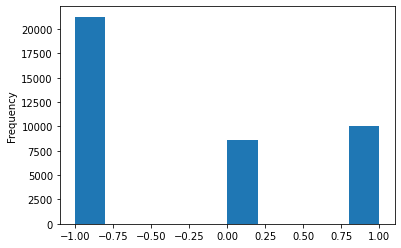

In [ ]:
emotion2['score'].plot(kind='hist')

In [ ]:
emotion2['TextBlob_note'].value_counts().sort_index(ascending=True)

-1     4253
 0    24926
 1    10821
Name: TextBlob_note, dtype: int64

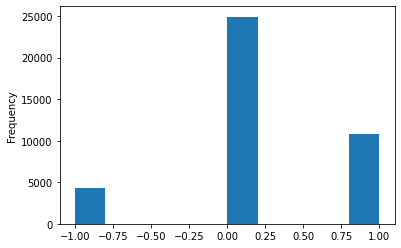

In [ ]:
emotion2['TextBlob_note'].plot(kind='hist')

In [ ]:
# TextBlob gave us much less positive results. The neutral propotion becomes the most majority part now.
# Scores in Q1 are more 'sensitive' since there were given targets of those emotional expression. Sentiment might not be captured if
# people were not very aggressive either way. 

## End of Assignment